In [7]:
pip install pycaret

Note: you may need to restart the kernel to use updated packages.


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
from pycaret.classification import *

In [15]:
# https://www.kaggle.com/competitions/titanic
# Obtenemos los distintos dataset correspondientes a:
# train.csv,
# test.csv y
# gender_submission.csv

In [16]:
df = pd.read_csv("../../datos/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## setup()

In [17]:
# En este caso concreto, haríamos el drop()
# las columnas que no queremos las ignoramos con ignore_features
# la data es el propio dataframe obtenido con train.csv
# la columna (y) es "Survived"
# Si estamos de acuerdo con los tipos de datos, click en Enter.
# (Cuando ejecutamos la celda, debemos esperar y después hacer click en Enter...)
# Pclass podría ser "ordinal", pero lo ponemos como Categorical
# SibSp y Parch con categóricas con un limitado numero de posibles valores
# pudimos considerar (quizá) como numéricas, no obstante.

In [18]:
clf = setup(data=df, target="Survived", ignore_features=["Name", "Ticket", "PassengerId"])

,Description,Value
0,session_id,4907
1,Target,Survived
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(891, 12)"
5,Missing Values,True
6,Numeric Features,2
7,Categorical Features,6
8,Ordinal Features,False
9,High Cardinality Features,False


## compare_models()

In [19]:
# K-fold cross validation: revisar que es?¿
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8235,0.8613,0.7387,0.8023,0.7674,0.6255,0.6287,0.1290
lr,Logistic Regression,0.8187,0.8528,0.7353,0.7962,0.7631,0.6167,0.6194,1.7800
ridge,Ridge Classifier,0.8090,0.0000,0.7067,0.7908,0.7450,0.5932,0.5968,0.0280
lda,Linear Discriminant Analysis,0.8090,0.8496,0.7022,0.7938,0.7436,0.5923,0.5965,0.0440
lightgbm,Light Gradient Boosting Machine,0.7978,0.8467,0.7108,0.7616,0.7334,0.5711,0.5737,0.0580
ada,Ada Boost Classifier,0.7961,0.8379,0.7508,0.7398,0.7445,0.5748,0.5756,0.0820
rf,Random Forest Classifier,0.7930,0.8390,0.7103,0.7517,0.7298,0.5622,0.5634,0.1990
et,Extra Trees Classifier,0.7866,0.8125,0.6902,0.7497,0.7175,0.5465,0.5488,0.1950
dt,Decision Tree Classifier,0.7591,0.7428,0.6982,0.6950,0.6955,0.4964,0.4975,0.0110
knn,K Neighbors Classifier,0.6902,0.7124,0.5428,0.6255,0.5790,0.3361,0.3398,0.0580


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=4907, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

## create_model()

Para los 2 o 3 mejores:
    
    * En mi caso el mejor modelo es GradientBoostingClassifier
    * Lo parámetros que muestra son ACCURACY y AUC, dando los mejores porcentajes.

In [20]:
gbc = create_model("gbc")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7619,0.8389,0.6800,0.7083,0.6939,0.4992,0.4995
1,0.8254,0.8705,0.7200,0.8182,0.7660,0.6276,0.6309
2,0.8730,0.9200,0.8400,0.8400,0.8400,0.7347,0.7347
3,0.8065,0.8268,0.7083,0.7727,0.7391,0.5857,0.5871
4,0.8065,0.8728,0.7083,0.7727,0.7391,0.5857,0.5871
5,0.7903,0.8443,0.6667,0.7619,0.7111,0.5477,0.5507
6,0.8871,0.8520,0.7917,0.9048,0.8444,0.7565,0.7606
7,0.8871,0.9068,0.7917,0.9048,0.8444,0.7565,0.7606
8,0.8226,0.8335,0.6800,0.8500,0.7556,0.6190,0.6285


In [21]:
lr = create_model("lr")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7302,0.8337,0.6400,0.6667,0.6531,0.4324,0.4327
1,0.8095,0.8384,0.7200,0.7826,0.7500,0.5966,0.5979
2,0.8571,0.9295,0.7600,0.8636,0.8085,0.6953,0.6989
3,0.7581,0.8202,0.7083,0.6800,0.6939,0.4940,0.4943
4,0.8226,0.8618,0.7917,0.7600,0.7755,0.6289,0.6293
5,0.8548,0.8531,0.7500,0.8571,0.8000,0.6869,0.6906
6,0.8871,0.8465,0.7917,0.9048,0.8444,0.7565,0.7606
7,0.8871,0.9024,0.7917,0.9048,0.8444,0.7565,0.7606
8,0.8226,0.8400,0.6800,0.8500,0.7556,0.6190,0.6285


In [22]:
et = create_model("et")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7937,0.8200,0.6800,0.7727,0.7234,0.5599,0.5628
1,0.8413,0.8268,0.7600,0.8261,0.7917,0.6638,0.6653
2,0.6984,0.8095,0.5600,0.6364,0.5957,0.3568,0.3587
3,0.7419,0.7615,0.5833,0.7000,0.6364,0.4389,0.4433
4,0.8226,0.8613,0.7500,0.7826,0.7660,0.6232,0.6236
5,0.7742,0.8070,0.6250,0.7500,0.6818,0.5090,0.5141
6,0.8065,0.8284,0.7500,0.7500,0.7500,0.5921,0.5921
7,0.9032,0.9046,0.8333,0.9091,0.8696,0.7929,0.7948
8,0.7581,0.7811,0.6400,0.7273,0.6809,0.4873,0.4899


In [23]:
nb = create_model("nb")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6667,0.8600,0.1600,1.0000,0.2759,0.1868,0.3210
1,0.5873,0.7837,0.0400,0.3333,0.0714,-0.0149,-0.0290
2,0.6508,0.9011,0.1600,0.8000,0.2667,0.1549,0.2420
3,0.6935,0.7873,0.2083,1.0000,0.3448,0.2439,0.3727
4,0.6774,0.7599,0.2083,0.8333,0.3333,0.2112,0.2999
5,0.6935,0.7440,0.2083,1.0000,0.3448,0.2439,0.3727
6,0.6290,0.7604,0.0417,1.0000,0.0800,0.0506,0.1611
7,0.6613,0.8218,0.1250,1.0000,0.2222,0.1490,0.2837
8,0.6290,0.8000,0.0800,1.0000,0.1481,0.0940,0.2221


In [24]:
ada = create_model("ada")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7302,0.8084,0.6800,0.6538,0.6667,0.4401,0.4404
1,0.8254,0.8784,0.8000,0.7692,0.7843,0.6377,0.6381
2,0.8889,0.9205,0.8800,0.8462,0.8627,0.7695,0.7699
3,0.7419,0.8087,0.6667,0.6667,0.6667,0.4561,0.4561
4,0.7903,0.8662,0.7500,0.7200,0.7347,0.5615,0.5618
5,0.8065,0.8317,0.7500,0.7500,0.7500,0.5921,0.5921
6,0.8065,0.7955,0.7083,0.7727,0.7391,0.5857,0.5871
7,0.8871,0.8580,0.8333,0.8696,0.8511,0.7602,0.7607
8,0.7903,0.8135,0.7200,0.7500,0.7347,0.5615,0.5618


## tune_model() para los 2 o 3 mejores

In [25]:
tune_gbc_auc = tune_model(gbc, optimize="AUC")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7460,0.8258,0.6400,0.6957,0.6667,0.4621,0.4632
1,0.8413,0.8568,0.7600,0.8261,0.7917,0.6638,0.6653
2,0.8730,0.9237,0.8400,0.8400,0.8400,0.7347,0.7347
3,0.7258,0.8152,0.6667,0.6400,0.6531,0.4266,0.4268
4,0.8065,0.8613,0.7917,0.7308,0.7600,0.5983,0.5996
5,0.7903,0.8372,0.6250,0.7895,0.6977,0.5405,0.5491
6,0.8710,0.8690,0.7917,0.8636,0.8261,0.7238,0.7256
7,0.9032,0.8936,0.8333,0.9091,0.8696,0.7929,0.7948
8,0.8065,0.8411,0.6800,0.8095,0.7391,0.5871,0.5928


In [26]:
tune_gbc_acc = tune_model(gbc, optimize="Accuracy")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7460,0.8258,0.6400,0.6957,0.6667,0.4621,0.4632
1,0.8413,0.8568,0.7600,0.8261,0.7917,0.6638,0.6653
2,0.8730,0.9237,0.8400,0.8400,0.8400,0.7347,0.7347
3,0.7258,0.8152,0.6667,0.6400,0.6531,0.4266,0.4268
4,0.8065,0.8613,0.7917,0.7308,0.7600,0.5983,0.5996
5,0.7903,0.8372,0.6250,0.7895,0.6977,0.5405,0.5491
6,0.8710,0.8690,0.7917,0.8636,0.8261,0.7238,0.7256
7,0.9032,0.8936,0.8333,0.9091,0.8696,0.7929,0.7948
8,0.8065,0.8411,0.6800,0.8095,0.7391,0.5871,0.5928


In [27]:
tune_lr_acc = tune_model(lr, optimize="Accuracy")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7619,0.8389,0.7200,0.6923,0.7059,0.5060,0.5063
1,0.7937,0.8405,0.7200,0.7500,0.7347,0.5660,0.5663
2,0.8730,0.9358,0.8800,0.8148,0.8462,0.7383,0.7399
3,0.7581,0.8246,0.7083,0.6800,0.6939,0.4940,0.4943
4,0.8387,0.8783,0.7917,0.7917,0.7917,0.6601,0.6601
5,0.8548,0.8586,0.7500,0.8571,0.8000,0.6869,0.6906
6,0.8710,0.8454,0.7917,0.8636,0.8261,0.7238,0.7256
7,0.8871,0.8750,0.7917,0.9048,0.8444,0.7565,0.7606
8,0.8387,0.8454,0.7200,0.8571,0.7826,0.6559,0.6622


In [28]:
tune_et_auc = tune_model(et, optimize="AUC")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7143,0.8200,0.7200,0.6207,0.6667,0.4191,0.4226
1,0.8095,0.8542,0.8000,0.7407,0.7692,0.6075,0.6088
2,0.8413,0.9305,0.8400,0.7778,0.8077,0.6729,0.6743
3,0.7742,0.8284,0.7083,0.7083,0.7083,0.5241,0.5241
4,0.7419,0.8657,0.7917,0.6333,0.7037,0.4801,0.4895
5,0.7903,0.8322,0.7083,0.7391,0.7234,0.5547,0.5550
6,0.8065,0.8509,0.7917,0.7308,0.7600,0.5983,0.5996
7,0.8871,0.9243,0.8333,0.8696,0.8511,0.7602,0.7607
8,0.7742,0.8346,0.6800,0.7391,0.7083,0.5246,0.5259


In [29]:
tune_et_acc = tune_model(et, optimize="Accuracy")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7302,0.8137,0.6400,0.6667,0.6531,0.4324,0.4327
1,0.7778,0.8384,0.7600,0.7037,0.7308,0.5421,0.5432
2,0.8571,0.9421,0.8000,0.8333,0.8163,0.6995,0.6999
3,0.7903,0.8130,0.6667,0.7619,0.7111,0.5477,0.5507
4,0.7903,0.8531,0.7500,0.7200,0.7347,0.5615,0.5618
5,0.8226,0.8454,0.7083,0.8095,0.7556,0.6173,0.6207
6,0.8226,0.8421,0.7917,0.7600,0.7755,0.6289,0.6293
7,0.9032,0.9221,0.7917,0.9500,0.8636,0.7896,0.7975
8,0.8226,0.8497,0.7200,0.8182,0.7660,0.6240,0.6273


## plot_model() para el mejor modelo

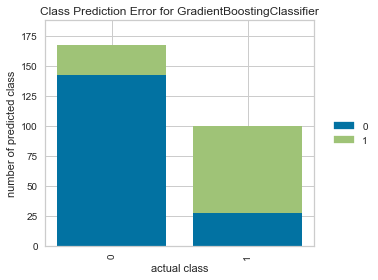

In [31]:
# tune_gbc_acc consigue:
# 0.8583 (Accuracy) - 0.8583 (AUC)
plot_model(tune_gbc_acc, plot="error")

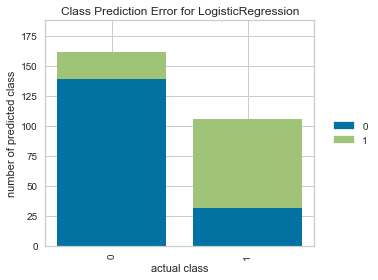

In [36]:
plot_model(tune_lr_acc, plot="error")

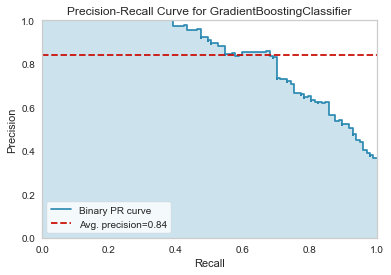

In [32]:
plot_model(tune_gbc_acc, plot="pr")

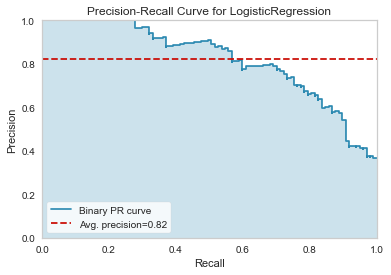

In [37]:
plot_model(tune_lr_acc, plot="pr")

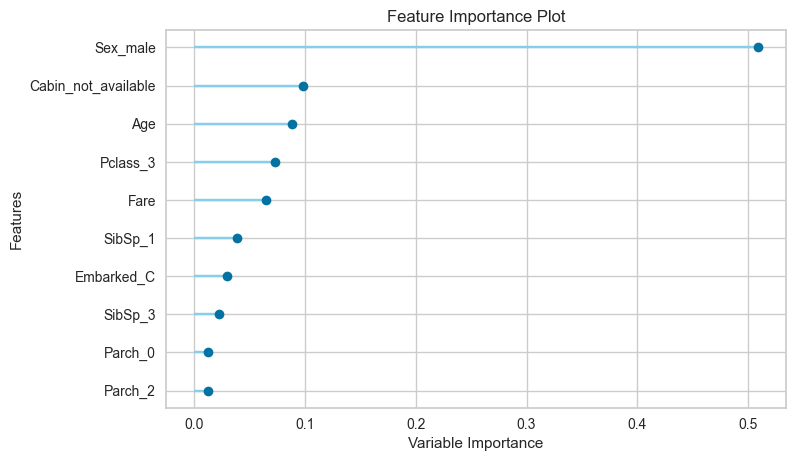

In [33]:
plot_model(tune_gbc_acc, plot="feature")

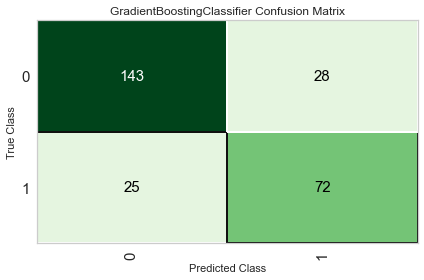

In [34]:
plot_model(tune_gbc_acc, plot="confusion_matrix")

## evaluate_model() para el mejor

In [35]:
evaluate_model(tune_gbc_acc)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

## nos vamos a test.csv

In [38]:
test = pd.read_csv("../../datos/test.csv")
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


## Realizamos la predicción

In [39]:
predicciones = predict_model(tune_gbc_acc, data=test)
predicciones

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Label,Score
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,0.8754
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0.6803
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,0.8719
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0.8984
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1,0.6368
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0,0.8994
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1,0.9529
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0,0.9251
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0,0.8994


In [40]:
predicciones_submission = predicciones[["PassengerId", "Label"]]
predicciones_submission

,PassengerId,Label
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [42]:
submission = pd.read_csv("../../datos/gender_submission.csv")
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
